<a href="https://colab.research.google.com/github/NittyNice/BADS7105-CRM-Analytics/blob/main/Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and config


## Install PyCaret and Plotly package

[MLxtend](http://rasbt.github.io/mlxtend/) is a Python library of useful tools for the day-to-day data science tasks.

In [433]:
# !pip install mlxtend

## Mount google drive
Google Colab provides library to connect directly to Google Drive.  
Alternative way connection to the storage for loading and saving data files.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Use Linux command – <code>ls</code> to displays the contents of a directory.

In [4]:
!ls /content/gdrive/MyDrive/BADS7105_CRM

data  manytime_purchase_clustering.csv	onetime_purchase_clustering.csv


After checking that a directory exists, we create a variable <code>PATH</code> to contain the directory path.

In [5]:
PATH = "/content/gdrive/MyDrive/BADS7105_CRM"

## Import packages

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
%matplotlib inline

# Product recommendation

## Load the Customer Preference Survey dataset
In this work, we have stored the dataset in Google drive. Therefore, we will read the dataset from the directory where it is stored.  
You can load the dataset according to the directory where you store the them or others method.

In [22]:
# load data from Google Drive
df = pd.read_csv(PATH + '/data/Customer Preference Survey.csv')

# # load data from the same directory
# df = pd.read_csv('data/Customer Preference Survey.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Timestamp               29 non-null     object
 1   Program license         15 non-null     object
 2   Washing machine         15 non-null     object
 3   NONE                    17 non-null     object
 4   Running shoes           29 non-null     object
 5   Crispy veggie           29 non-null     object
 6   Training courses        29 non-null     object
 7   Nintendo switch         29 non-null     object
 8   Bitcoin                 29 non-null     object
 9   Mechanical keyboard     29 non-null     object
 10  Dyson Vacuum cleaner    29 non-null     object
 11  ipad case               29 non-null     object
 12  Level-adjustable Table  29 non-null     object
 13  Pimripie's Products     29 non-null     object
 14  IPHONE 13               29 non-null     object
 15  True wir

### Dataframe overview

In [23]:
df.head()

,Timestamp,Program license,Washing machine,NONE,Running shoes,Crispy veggie,Training courses,Nintendo switch,Bitcoin,Mechanical keyboard,Dyson Vacuum cleaner,ipad case,Level-adjustable Table,Pimripie's Products,IPHONE 13,True wireless earpod,Starbucks cup,Seat cushion,Capsule coffee machine,Airfare to Japan,E-book,Refrigerator,Film Camera,Musical Instruments,Whey protein,Sacred object,Talking cactus toy,ROV Skin
0,10/28/2021 14:05:59,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/28/2021 14:06:18,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,10/28/2021 14:06:20,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/28/2021 14:06:21,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/28/2021 14:06:23,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In the dataframe, the column names represent the name of the products and each row represents data in category type whether purchased or never purchased that product.

In [24]:
# show all products
df.columns

Index(['Timestamp', 'Program license', 'Washing machine', 'NONE',
       'Running shoes', 'Crispy veggie', 'Training courses', 'Nintendo switch',
       'Bitcoin', 'Mechanical keyboard', 'Dyson Vacuum cleaner', 'ipad case',
       'Level-adjustable Table', 'Pimripie's Products', 'IPHONE 13',
       'True wireless earpod', 'Starbucks cup', 'Seat cushion',
       'Capsule coffee machine', 'Airfare to Japan', 'E-book', 'Refrigerator',
       'Film Camera', 'Musical Instruments', 'Whey protein', 'Sacred object',
       'Talking cactus toy', 'ROV Skin'],
      dtype='object')

### Find all unique category values

In [25]:
np.unique(df.drop('Timestamp', axis=1).values.astype('str'))

array(['nan', 'ตัวเลือก 1', 'เคย', 'เคยซื้อ', 'ไม่เคย', 'ไม่เคยซื้อ'],
      dtype='<U10')

### Clean data and change from Thai to English
- We found 'NONE' in list of products so that column will be removed.  
- Missing purchase data will be labeled as never purchased because it will be included in the market basket analysis but will have a low support value.



In [29]:
# remove 'NONE' column
df.drop(['NONE','Timestamp'], inplace=True, axis=1, errors='ignore')

# fill missing data with nerver
df.fillna('never', inplace=True)

# change data from Thai to English
df.replace({'ตัวเลือก 1':'never', 'เคย':'purchased', 'เคยซื้อ':'purchased', 'ไม่เคย':'never', 'ไม่เคยซื้อ':'never'}, inplace=True)

# check updated unique category values
np.unique(df.values.astype('str'))

array(['never', 'purchased'], dtype='<U9')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Program license         29 non-null     object
 1   Washing machine         29 non-null     object
 2   Running shoes           29 non-null     object
 3   Crispy veggie           29 non-null     object
 4   Training courses        29 non-null     object
 5   Nintendo switch         29 non-null     object
 6   Bitcoin                 29 non-null     object
 7   Mechanical keyboard     29 non-null     object
 8   Dyson Vacuum cleaner    29 non-null     object
 9   ipad case               29 non-null     object
 10  Level-adjustable Table  29 non-null     object
 11  Pimripie's Products     29 non-null     object
 12  IPHONE 13               29 non-null     object
 13  True wireless earpod    29 non-null     object
 14  Starbucks cup           29 non-null     object
 15  Seat cus

## Show the top 10 best sellers

In [ ]:
# # see all available style
# plt.style.available

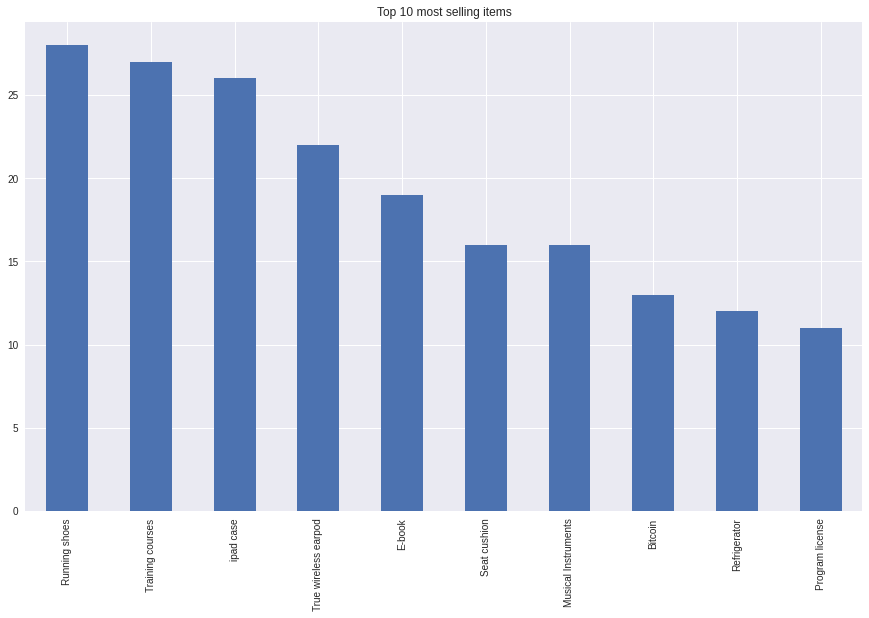

In [31]:
plt.style.use('seaborn')
df.isin(['purchased']).sum(axis=0).nlargest(10).plot.bar(figsize=(15,9), 
                                                         title='Top 10 most selling items')

## Market busket analysis

### Convert dataframe in categorical to one-hot

In [33]:
df_onehot = df.replace(['never', 'purchased'], [0, 1])
df_onehot.head()

,Program license,Washing machine,Running shoes,Crispy veggie,Training courses,Nintendo switch,Bitcoin,Mechanical keyboard,Dyson Vacuum cleaner,ipad case,Level-adjustable Table,Pimripie's Products,IPHONE 13,True wireless earpod,Starbucks cup,Seat cushion,Capsule coffee machine,Airfare to Japan,E-book,Refrigerator,Film Camera,Musical Instruments,Whey protein,Sacred object,Talking cactus toy,ROV Skin
0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


### Create itemset with minimum support threshold filter

In [50]:
frequent_itemsets = apriori(df_onehot, min_support=0.2, use_colnames=True)

print(f'Number of itemset that passed the minimum SUPPORT filtering: {len(frequent_itemsets)}')
frequent_itemsets.head(10)

Number of itemset that passed the minimum SUPPORT filtering: 393


,support,itemsets
0,0.379310,(Program license)
1,0.965517,(Running shoes)
2,0.344828,(Crispy veggie)
3,0.931034,(Training courses)
4,0.241379,(Nintendo switch)
5,0.448276,(Bitcoin)
6,0.896552,(ipad case)
7,0.758621,(True wireless earpod)
8,0.241379,(Starbucks cup)
9,0.551724,(Seat cushion)


### Create association rules

In [51]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

print(f'Number of association rules that passed the LIFT filtering: {len(rules)}')
rules.head(10)

Number of association rules that passed the LIFT filtering: 2082


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nintendo switch),(True wireless earpod),0.241379,0.758621,0.241379,1.000000,1.318182,0.058264,inf
1,(True wireless earpod),(Nintendo switch),0.758621,0.241379,0.241379,0.318182,1.318182,0.058264,1.112644
2,(Nintendo switch),(E-book),0.241379,0.655172,0.206897,0.857143,1.308271,0.048751,2.413793
3,(E-book),(Nintendo switch),0.655172,0.241379,0.206897,0.315789,1.308271,0.048751,1.108753
4,(Bitcoin),(True wireless earpod),0.448276,0.758621,0.413793,0.923077,1.216783,0.073722,3.137931
5,(True wireless earpod),(Bitcoin),0.758621,0.448276,0.413793,0.545455,1.216783,0.073722,1.213793
6,(ROV Skin),(True wireless earpod),0.241379,0.758621,0.241379,1.000000,1.318182,0.058264,inf
7,(True wireless earpod),(ROV Skin),0.758621,0.241379,0.241379,0.318182,1.318182,0.058264,1.112644
8,(Seat cushion),(Airfare to Japan),0.551724,0.310345,0.241379,0.437500,1.409722,0.070155,1.226054
9,(Airfare to Japan),(Seat cushion),0.310345,0.551724,0.241379,0.777778,1.409722,0.070155,2.017241


In [52]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000
mean,0.447415,0.447415,0.243002,0.616006,1.396654,0.064535,inf
std,0.170306,0.170306,0.053007,0.221561,0.200415,0.019594,NaN
min,0.206897,0.206897,0.206897,0.250000,1.208333,0.035672,1.057471
25%,0.310345,0.310345,0.206897,0.437500,1.260870,0.049941,1.172414
50%,0.413793,0.413793,0.206897,0.600000,1.318182,0.061831,1.408867
75%,0.551724,0.551724,0.275862,0.800000,1.450000,0.074911,2.017241
max,0.827586,0.827586,0.551724,1.000000,2.071429,0.124851,inf


## Find interesting itemset pairings for recommendation.

### Recommend a single product

In [66]:
recomment_single = rules[(rules['confidence'] >= 0.6) & 
                         (rules['consequents'].map(len) == 1)].sort_values(by=['lift'], ascending=False)

print(f'Number of recommend a single product list: {len(recomment_single)}')
recomment_single

Number of recommend a single product list: 255


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1364,"(ipad case, Musical Instruments, Airfare to Ja...",(Seat cushion),0.206897,0.551724,0.206897,1.000000,1.812500,0.092747,inf
552,"(Musical Instruments, Airfare to Japan, Traini...",(Seat cushion),0.206897,0.551724,0.206897,1.000000,1.812500,0.092747,inf
148,"(Musical Instruments, Airfare to Japan)",(Seat cushion),0.206897,0.551724,0.206897,1.000000,1.812500,0.092747,inf
646,"(ipad case, Musical Instruments, Airfare to Ja...",(Seat cushion),0.206897,0.551724,0.206897,1.000000,1.812500,0.092747,inf
346,"(ipad case, Refrigerator, Running shoes)",(Musical Instruments),0.310345,0.551724,0.275862,0.888889,1.611111,0.104637,4.034483
138,"(ipad case, Refrigerator)",(Musical Instruments),0.310345,0.551724,0.275862,0.888889,1.611111,0.104637,4.034483
973,"(ipad case, Refrigerator, Running shoes, Train...",(Musical Instruments),0.275862,0.551724,0.241379,0.875000,1.585938,0.089180,3.586207
1196,"(ipad case, Refrigerator, E-book, Running shoes)",(Musical Instruments),0.275862,0.551724,0.241379,0.875000,1.585938,0.089180,3.586207
536,"(ipad case, Refrigerator, Training courses)",(Musical Instruments),0.275862,0.551724,0.241379,0.875000,1.585938,0.089180,3.586207
665,"(ipad case, Refrigerator, E-book)",(Musical Instruments),0.275862,0.551724,0.241379,0.875000,1.585938,0.089180,3.586207


### Buy 2 get 15% off on *top*

#### Already add antecedent on basket, recommend the consequent

In [69]:
recomment_consequent = rules[(rules['confidence'] >= 0.4375) & 
                             (rules['antecedents'].map(len) == 1) & 
                             (rules['consequents'].map(len) == 1)].sort_values(by=['lift'], ascending=False)

print(f'Number of recommend a single product list: {len(recomment_consequent)}')
recomment_consequent

Number of recommend a single product list: 12


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(Airfare to Japan),(Seat cushion),0.310345,0.551724,0.241379,0.777778,1.409722,0.070155,2.017241
8,(Seat cushion),(Airfare to Japan),0.551724,0.310345,0.241379,0.437500,1.409722,0.070155,1.226054
0,(Nintendo switch),(True wireless earpod),0.241379,0.758621,0.241379,1.000000,1.318182,0.058264,inf
6,(ROV Skin),(True wireless earpod),0.241379,0.758621,0.241379,1.000000,1.318182,0.058264,inf
2,(Nintendo switch),(E-book),0.241379,0.655172,0.206897,0.857143,1.308271,0.048751,2.413793
10,(Seat cushion),(Musical Instruments),0.551724,0.551724,0.379310,0.687500,1.246094,0.074911,1.434483
11,(Musical Instruments),(Seat cushion),0.551724,0.551724,0.379310,0.687500,1.246094,0.074911,1.434483
5,(True wireless earpod),(Bitcoin),0.758621,0.448276,0.413793,0.545455,1.216783,0.073722,1.213793
4,(Bitcoin),(True wireless earpod),0.448276,0.758621,0.413793,0.923077,1.216783,0.073722,3.137931
13,(Airfare to Japan),(Musical Instruments),0.310345,0.551724,0.206897,0.666667,1.208333,0.035672,1.344828


#### Pop up advertising, "Product Matching Discount" for who already have certain itemset on basket.

In [99]:
recomment_matching_on_single = rules[(rules['confidence'] >= 0.6) & 
                                     (rules['antecedents'].map(len) == 1) &
                                     (rules['consequents'].map(len) == 2)].sort_values(by=['lift'], ascending=False)

print(f'Number of recommend a single product list: {len(recomment_matching_on_single)}')
recomment_matching_on_single

Number of recommend a single product list: 37


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
101,(Nintendo switch),"(E-book, True wireless earpod)",0.241379,0.448276,0.206897,0.857143,1.912088,0.098692,3.862069
151,(Airfare to Japan),"(Seat cushion, Musical Instruments)",0.310345,0.379310,0.206897,0.666667,1.757576,0.089180,1.862069
113,(Bitcoin),"(E-book, True wireless earpod)",0.448276,0.448276,0.310345,0.692308,1.544379,0.109394,1.793103
54,(Nintendo switch),"(True wireless earpod, Training courses)",0.241379,0.689655,0.241379,1.000000,1.450000,0.074911,inf
120,(ROV Skin),"(ipad case, True wireless earpod)",0.241379,0.689655,0.241379,1.000000,1.450000,0.074911,inf
92,(Nintendo switch),"(ipad case, True wireless earpod)",0.241379,0.689655,0.241379,1.000000,1.450000,0.074911,inf
125,(Airfare to Japan),"(ipad case, Seat cushion)",0.310345,0.551724,0.241379,0.777778,1.409722,0.070155,2.017241
79,(Airfare to Japan),"(Seat cushion, Training courses)",0.310345,0.551724,0.241379,0.777778,1.409722,0.070155,2.017241
58,(Nintendo switch),"(E-book, Training courses)",0.241379,0.620690,0.206897,0.857143,1.380952,0.057075,2.655172
96,(Nintendo switch),"(ipad case, E-book)",0.241379,0.620690,0.206897,0.857143,1.380952,0.057075,2.655172


In [363]:
# pop up consequents lists
recomment_matching_on_single.groupby('antecedents')['consequents'].apply(list).to_frame()

,consequents
antecedents,
(Nintendo switch),"[(E-book, True wireless earpod), (True wireles..."
(Airfare to Japan),"[(Seat cushion, Musical Instruments), (ipad ca..."
(Bitcoin),"[(E-book, True wireless earpod), (ipad case, T..."
(ROV Skin),"[(ipad case, True wireless earpod), (Running s..."
(Seat cushion),"[(Musical Instruments, Training courses), (ipa..."
(Refrigerator),"[(Musical Instruments, Running shoes), (ipad c..."
(Musical Instruments),"[(ipad case, Seat cushion), (Seat cushion, Tra..."
(Starbucks cup),"[(True wireless earpod, Training courses), (ip..."
(E-book),"[(Seat cushion, Running shoes)]"


In [366]:
# pop up consequents table
recomment_matching_on_single.groupby(['antecedents','consequents']).last()

antecedent support  consequent support   support  confidence      lift  leverage  conviction
antecedents           consequents                                                                                                                           
(Nintendo switch)     (E-book, True wireless earpod)                      0.241379            0.448276  0.206897    0.857143  1.912088  0.098692    3.862069
                      (True wireless earpod, Training courses)            0.241379            0.689655  0.241379    1.000000  1.450000  0.074911         inf
                      (ipad case, True wireless earpod)                   0.241379            0.689655  0.241379    1.000000  1.450000  0.074911         inf
                      (E-book, Training courses)                          0.241379            0.620690  0.206897    0.857143  1.380952  0.057075    2.655172
                      (ipad case, E-book)                                 0.241379            0.620690  0.206897    0.857143  1.380952  0.057075    2.655172
                      (Running shoes, True wireless earpod)               0.241379            0.758621  0.241379    1.000000  1.318182  0.058264         inf
                      (E-book, Running shoes)                             0.241379            0.655172  0.206897    0.857143  1.308271  0.048751    2.413793
                      (ipad case, Training courses)                       0.241379            0.827586  0.241379    1.000000  1.208333  0.041617         inf
(Airfare to Japan)    (Seat cushion, Musical Instruments)                 0.310345            0.379310  0.206897    0.666667  1.757576  0.089180    1.862069
                      (ipad case, Seat cushion)                           0.310345            0.551724  0.241379    0.777778  1.409722  0.070155    2.017241
                      (Seat cushion, Training courses)                    0.310345            0.551724  0.241379    0.777778  1.409722  0.070155    2.017241
                      (Musical Instruments, Training courses)             0.310345            0.517241  0.206897    0.666667  1.288889  0.046373    1.448276
                      (Seat cushion, Running shoes)                       0.310345            0.517241  0.206897    0.666667  1.288889  0.046373    1.448276
                      (ipad case, Musical Instruments)                    0.310345            0.551724  0.206897    0.666667  1.208333  0.035672    1.344828
                      (ipad case, Training courses)                       0.310345            0.827586  0.310345    1.000000  1.208333  0.053508         inf
(Bitcoin)             (E-book, True wireless earpod)                      0.448276            0.448276  0.310345    0.692308  1.544379  0.109394    1.793103
                      (ipad case, True wireless earpod)                   0.448276            0.689655  0.413793    0.923077  1.338462  0.104637    4.034483
                      (Running shoes, True wireless earpod)               0.448276            0.758621  0.413793    0.923077  1.216783  0.073722    3.137931
(ROV Skin)            (True wireless earpod, Training courses)            0.241379            0.689655  0.206897    0.857143  1.242857  0.040428    2.172414
                      (ipad case, True wireless earpod)                   0.241379            0.689655  0.241379    1.000000  1.450000  0.074911         inf
                      (Running shoes, True wireless earpod)               0.241379            0.758621  0.241379    1.000000  1.318182  0.058264         inf
(Seat cushion)        (E-book, Training courses)                          0.551724            0.620690  0.413793    0.750000  1.208333  0.071344    1.517241
                      (ipad case, E-book)                                 0.551724            0.620690  0.413793    0.750000  1.208333  0.071344    1.517241
                      (Musical Instruments, Training courses)             0.551724            0.517241  0.379310    0.687500  1.329167  0.0

## Display

In [341]:
import networkx as nx
from networkx.algorithms import bipartite

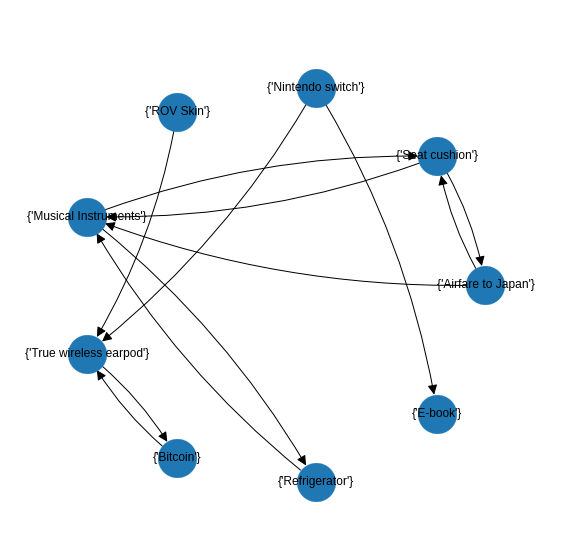

In [432]:
G = nx.DiGraph()

G.add_nodes_from(recomment_consequent['antecedents'])
G.add_nodes_from(recomment_consequent['antecedents'])
G.add_edges_from([(row['antecedents'], row['consequents']) for idx, row in recomment_consequent.iterrows()])

pos = nx.circular_layout(G)

plt.figure(figsize=(10,10))
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min)
plt.xlim(x_min - x_margin*0.2, x_max + x_margin*0.2)
plt.ylim(x_min - x_margin*0.2, x_max + x_margin*0.2)

nx.draw(G, pos, width = 1, node_size=1500, arrows=True, arrowsize=20, connectionstyle='arc3, rad = -0.1', with_labels=False)

label_antecedents = {i:j for i,j in zip(recomment_consequent['antecedents'].to_list(),
                                        [set(i) for i in recomment_consequent['antecedents'].to_list()])}
label_consequents = {i:j for i,j in zip(recomment_consequent['consequents'].to_list(),
                                        [set(i) for i in recomment_consequent['consequents'].to_list()])}
label_name = {**label_antecedents, **label_consequents}

nx.draw_networkx_labels(G, pos, labels=label_name)
plt.show()

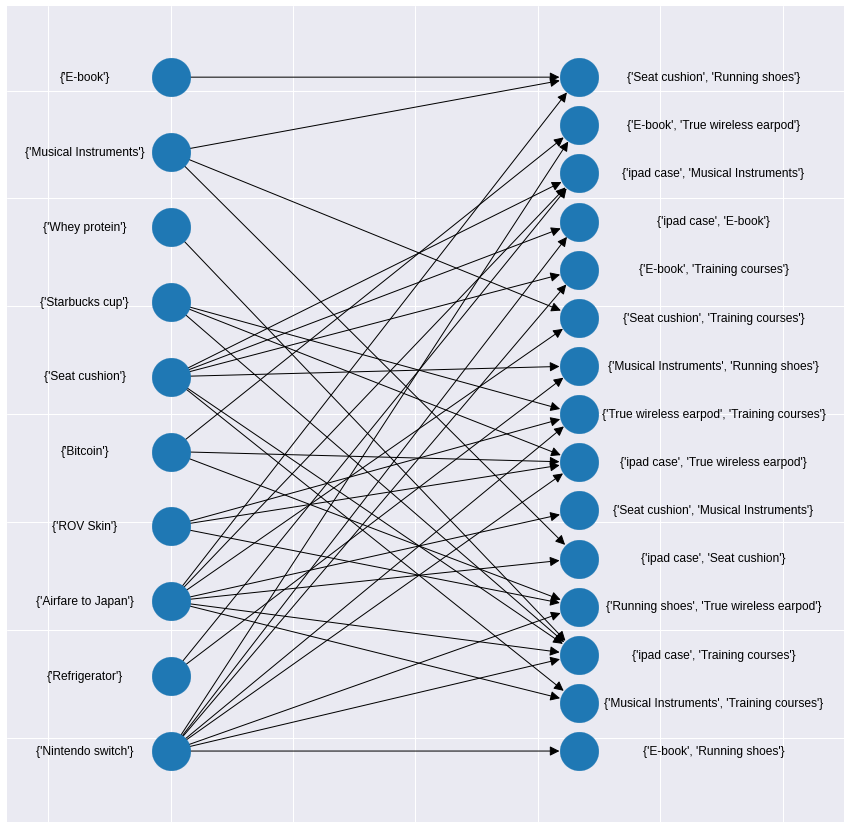

In [416]:
G = nx.Graph()

G.add_nodes_from(recomment_matching_on_single['antecedents'], bipartite=0)
G.add_nodes_from(recomment_matching_on_single['consequents'], bipartite=1)
G.add_edges_from([(row['antecedents'], row['consequents']) for idx, row in recomment_matching_on_single.iterrows()])


pos = nx.drawing.layout.bipartite_layout(G, recomment_matching_on_single['antecedents'], scale=10)


pos_label = nx.drawing.layout.bipartite_layout(G, recomment_matching_on_single['antecedents'], scale=10)
for p in pos_label.keys():
  if p in recomment_matching_on_single['antecedents'].to_list():
    pos_label[p] = [pos_label[p][0]-3.5,pos_label[p][1]]
  else:
    pos_label[p] = [pos_label[p][0]+5.5,pos_label[p][1]]


plt.figure(figsize=(15,15))
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min)
plt.xlim(x_min - x_margin*0.4, x_max + x_margin*0.65)

bipartite.is_bipartite(G)
nx.draw_networkx(G, pos, width = 1, with_labels=False, node_size=1500, arrows=True, arrowsize=20)


label_antecedents = {i:j for i,j in zip(recomment_matching_on_single['antecedents'].to_list(),
                                        [set(i) for i in recomment_matching_on_single['antecedents'].to_list()])}
label_consequents = {i:j for i,j in zip(recomment_matching_on_single['consequents'].to_list(),
                                        [set(i) for i in recomment_matching_on_single['consequents'].to_list()])}
label_name = {**label_antecedents, **label_consequents}


nx.draw_networkx_labels(G, pos_label, labels=label_name)
plt.show()